## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Dataset Charecteristics:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


## Import Required Libraries


In [65]:
# importing the required necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset 

In [66]:
# loading the dataset that we are working on, in this case it is day.csv file
data = pd.read_csv("day.csv")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [67]:
# shape of the dataset
data.shape

(730, 16)

In [68]:
# let's clearly see what we are working on
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [69]:
# observing the statistical info that we have on the given dataset
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [70]:
# finding out the information on datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Insights:
####  -> We can see that there are no missing values from the above cell, so we don't have much of data to clean, we find the unique vales present in each attribute and go for pre-processing the data

In [71]:
# finding out the unique values
data.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Data PrePocessing

In [72]:
# check for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Insights:
####  -> We can see that there are no null values from the above cell, so we have to look around the data and see if, in any case we can manipulate the data

#### -> for year, we have 'yr' as column heading, in the same we have other columns too, let's rename these column headings

In [73]:
data = data.rename(columns={'yr':'year',
                       'mnth':'month',
                       'weathersit':'weather',
                        'temp':'temperature',
                       'hum':'humidity',
                       'cnt':'count'})
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
data.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

-----
# Exploratory Data Anlysis

## Data Visualisation

In [75]:
# creating new dataframe by removing uneccessary/extra columns and assigning new dataframe bike with remaining columns

bike_new = ['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count']

bike = data[bike_new]
bike.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [76]:
bike.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [77]:
bike.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [78]:
bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [79]:
bike.weather.unique()

array([2, 1, 3], dtype=int64)

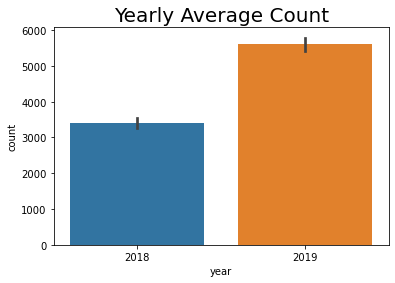

In [80]:
# mapping Year varible proper names for better visibilty

bike['year'] = bike['year'].map({0:'2018',1:'2019'})


# Visualising Yearly count of rented bikes

sns.barplot(bike['year'],bike['count'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

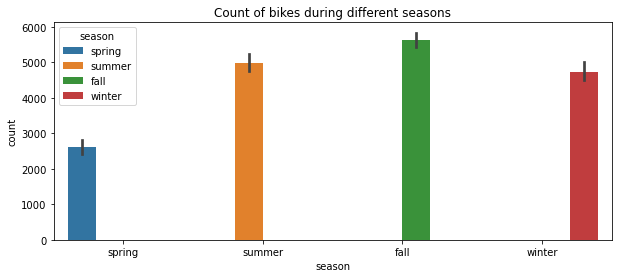

In [81]:
# mapping the characteristics for better visibilty
# season (1:spring, 2:summer, 3:fall, 4:winter)
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
# Visualising Seasons count of rented bikes

fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=bike, x='season', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

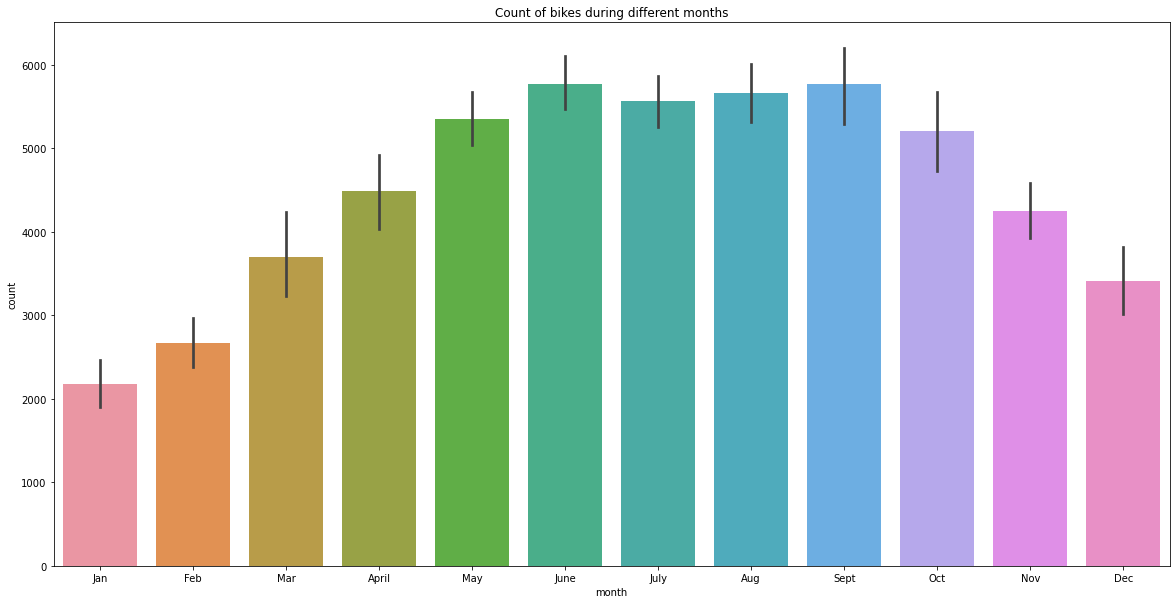

In [82]:
# mapping Month varible proper names for better visibilty

bike['month'] = bike['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})


# Visualising Monthly count of rented bikes

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bike, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

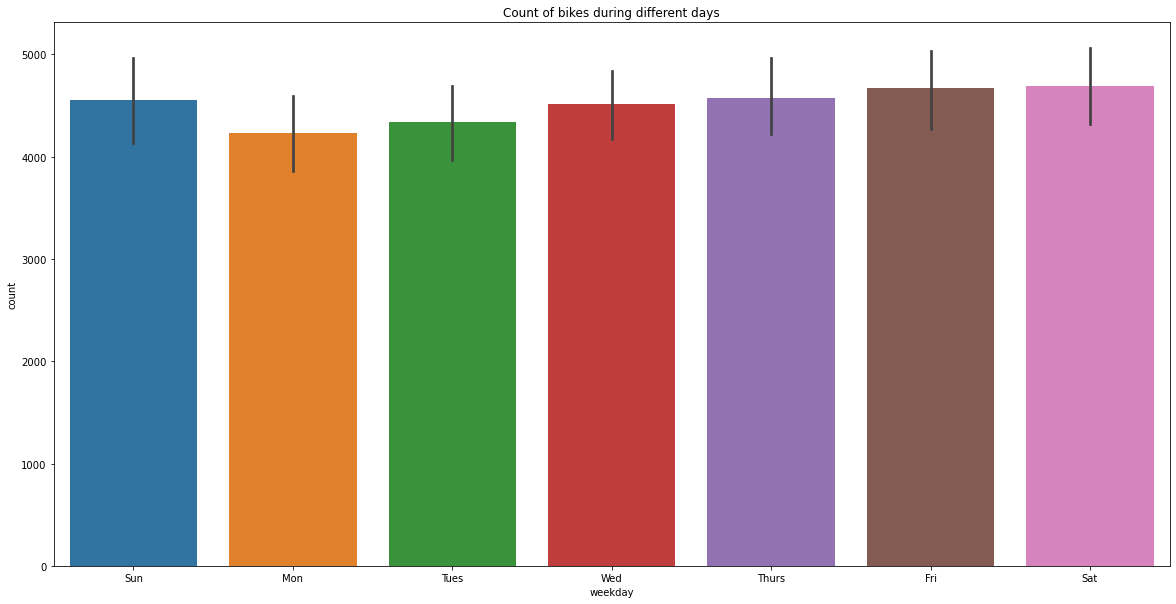

In [83]:
# mapping weekday variable proper names for better visibilty

bike['weekday'] = bike['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

# Visualising Daily count of rented bikes

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bike, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

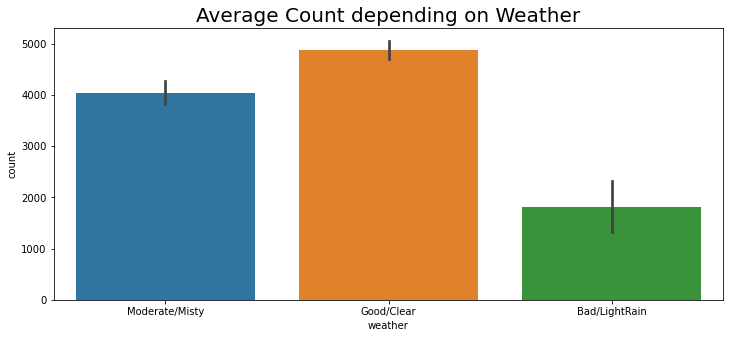

In [84]:
# mapping Weather varible proper names for better visibilty

#weathersit : 
# 1: Clear, Few clouds, Partly cloudy   = Good/Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad/Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain


bike['weather'] = bike['weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})


# Visualising Daily count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(bike['weather'],bike['count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()